In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('./properties_colombia_train.csv', encoding='utf-8')
df_test = pd.read_csv('./properties_colombia_test.csv', encoding='utf-8')

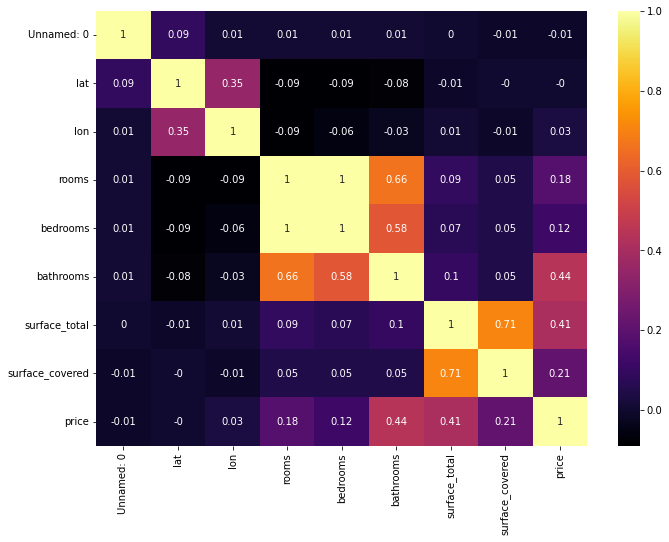

In [3]:
corr = df_train.corr().round(2)

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="inferno", annot=True)
plt.show()

revisando el inpacto de las demas variables sobre el precio podemos ver que las variables de rooms, bedrooms, bathrooms, surface_total

#### agregamos una columna para determinar si el precio de la casa es barato = 0 o caro = 1

In [4]:
mean_price = int(df_train.price.mean())
df_train['avg'] = df_train['price'].apply(lambda x: 1 if x > mean_price else 0)

#### revisamos la cantidad de valores nulos por columnas para ver cual sera el procedimiento de limpieza a usar

In [5]:
df_train.isnull().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
avg                     0
dtype: int64

In [33]:
from sklearn import preprocessing

columns = ['lat','lon','bathrooms','l2','l3','property_type', 'description','avg']

def main_normalize(df, columns):
    
    # normalizando description
    df['description'] = df['description'].astype('str')
    df['description'] = df['description'].str.lower()
    df['description'] = df['description'].str.replace('|', '')
    df['description'] = df['description'].str.replace('<br>', '')
    df['description'] = df['description'].str.replace('<br />', '')
    df['description'] = df['description'].str.replace('\n', '')
    df['description'] = df['description'].str.replace('<b>', '')
    df['description'] = df['description'].str.replace('</b>', '')

    def normalize(s):
        replacements = (
            ("á", "a"),
            ("é", "e"),
            ("í", "i"),
            ("ó", "o"),
            ("ú", "u"),
        )
        for a, b in replacements:
            s = s.replace(a, b).replace(a.upper(), b.upper())
        return s

    df['description'] = df['description'].apply(lambda x: normalize(x))

    import html

    df['description'] = df['description'].apply(lambda x: html.unescape(x))
    
    
    
    # # rellenando valores nulos
    # df['rooms'].fillna(df['rooms'].mode()[0], inplace=True)
    # df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
    # df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
    # df['l3'].fillna(df['l3'].mode()[0], inplace=True)
    # df['lat'].fillna(df['lat'].mode()[0], inplace=True)
    # df['lon'].fillna(df['lon'].mode()[0], inplace=True)
    # df['description'].fillna(df['description'].mode()[0], inplace=True)
    
    
    # seleccionando las columnas que tienen valores adecuados
    df = df[columns]
    
    
    # # aplicando encoding a columnas categoricas 
    # le1 = preprocessing.LabelEncoder()
    # le1.fit(df['l2'])
    # df['l2'] = le1.transform(df['l2'])

    # le2 = preprocessing.LabelEncoder()
    # le2.fit(df['l3'])
    # df['l3'] = le2.transform(df['l3'])

    # le3 = preprocessing.LabelEncoder()
    # le3.fit(df['property_type'])
    # df['property_type'] = le3.transform(df['property_type'])

    # le4 = preprocessing.LabelEncoder()
    # le4.fit(df['lat'])
    # df['lat'] = le4.transform(df['lat'])

    # le5 = preprocessing.LabelEncoder()
    # le5.fit(df['lon'])
    # df['lon'] = le5.transform(df['lon'])

    # le6 = preprocessing.LabelEncoder()
    # le6.fit(df['description'])
    # df['description'] = le6.transform(df['description'])
    
    return df
new_train = main_normalize(df_train, columns)
new_train.head(5)

,lat,lon,bathrooms,l2,l3,property_type,description,avg
0,6.20,-75.57,4.00,Antioquia,Medellín,Casa,hermosa mansion en el poblado. area construida...,1
1,4.72,-74.07,2.00,Cundinamarca,Bogotá D.C,Apartamento,venta apartamento en piso 16 con vista exterio...,0
2,4.71,-74.03,2.00,Cundinamarca,Bogotá D.C,Casa,al entrar a este bonito apartamento interior e...,0
3,NaN,NaN,1.00,Santander,Bucaramanga,Otro,se encuentra ubicado en el sector de la cabece...,1
4,NaN,NaN,2.00,Antioquia,Medellín,Apartamento,codigo inmueble 4302 apartamento con 3 habitac...,0


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer


train_normalize = new_train.apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))


imputer = KNNImputer(n_neighbors=100)
demo = imputer.fit_transform(train_normalize)
demo

array([[3.82210e+04, 1.84890e+04, 3.00000e+00, ..., 1.00000e+00,
        6.27790e+04, 1.00000e+00],
       [2.16270e+04, 3.89460e+04, 1.00000e+00, ..., 0.00000e+00,
        1.01716e+05, 0.00000e+00],
       [2.04380e+04, 4.49040e+04, 1.00000e+00, ..., 1.00000e+00,
        1.01250e+04, 0.00000e+00],
       ...,
       [4.83500e+03, 2.76900e+03, 0.00000e+00, ..., 6.00000e+00,
        5.62200e+04, 0.00000e+00],
       [1.71530e+04, 3.53430e+04, 1.00000e+00, ..., 1.00000e+00,
        3.98190e+04, 0.00000e+00],
       [4.81430e+04, 3.15310e+04, 0.00000e+00, ..., 0.00000e+00,
        7.88450e+04, 0.00000e+00]])

In [35]:
from sklearn import preprocessing

datos_min_max = preprocessing.MinMaxScaler().fit_transform(demo)
datos_min_max

array([[0.74831623, 0.36899036, 0.15789474, ..., 0.14285714, 0.566531  ,
        1.        ],
       [0.42342783, 0.77725667, 0.05263158, ..., 0.        , 0.91790674,
        0.        ],
       [0.4001488 , 0.89616221, 0.05263158, ..., 0.14285714, 0.09137015,
        0.        ],
       ...,
       [0.09466286, 0.05526174, 0.        , ..., 0.85714286, 0.5073412 ,
        0.        ],
       [0.33583288, 0.70535055, 0.05263158, ..., 0.14285714, 0.3593351 ,
        0.        ],
       [0.94257577, 0.62927336, 0.        , ..., 0.        , 0.71151399,
        0.        ]])

In [44]:
df_clean_train = pd.DataFrame(datos_min_max, columns=columns)
df_clean_train.to_csv('clean_train.csv', index=False)

In [42]:
# from xgboost import XGBClassifier
# import xgboost as xgb
# from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# model = XGBClassifier()
# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# score = model.score(X_test, y_test)
# matriz_confusion = confusion_matrix(y_test, predictions)
# recall = recall_score(y_test, predictions)

# print(f'accuracy: {score}')
# print(f'matriz de confusion \n{matriz_confusion}')
# print(f'recall: {recall}')

accuracy: 0.8934446975449253
matriz de confusion 
[[28734  1553]
 [ 2657  6566]]
recall: 0.711915862517619


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('./clean_train.csv')

X = df[['lat','lon','bathrooms','l2','l3','property_type','description']]
y = df['avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

algoritmo = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
algoritmo.fit(X_train, y_train)

y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print(matriz)
recall = recall_score(y_test, y_pred)
print(recall)

[[28374  1872]
 [ 2460  6804]]
0.7344559585492227


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

columns2 = ['lat','lon','rooms','bedrooms','bathrooms','l2','l3','property_type', 'description']

df_test = df_test[columns2]

test_normalize = df_test.apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))


imputer2 = KNNImputer(n_neighbors=100)
test_transform = imputer2.fit_transform(test_normalize)

from sklearn import preprocessing

datos_min_max2 = preprocessing.MinMaxScaler().fit_transform(test_transform)

df_clean_test = pd.DataFrame(datos_min_max2, columns=columns2)
df_clean_test[['lat','lon','bathrooms','l2','l3','property_type', 'description']].to_csv('clean_test.csv', index=False)


,lat,lon,rooms,bedrooms,bathrooms,l2,l3,property_type,description
0,0.412905,0.785461,0.0800,0.096774,0.111111,0.400000,0.091954,0.142857,0.463605
1,0.732442,0.389527,0.0888,0.101290,0.111111,0.033333,0.256705,0.000000,0.686459
2,0.801830,0.266513,0.1056,0.120968,0.000000,0.033333,0.517241,0.142857,0.335355
3,0.742745,0.410172,0.1052,0.119032,0.092778,0.033333,0.517241,0.571429,0.312614
4,0.549980,0.399591,0.0832,0.096129,0.055556,0.033333,0.517241,0.142857,0.403091
...,...,...,...,...,...,...,...,...,...
65845,0.754232,0.308661,0.0800,0.096774,0.068889,0.033333,0.517241,0.000000,0.995073
65846,0.550459,0.463342,0.0880,0.097097,0.000000,0.200000,0.494253,0.000000,0.791232
65847,0.604425,0.235510,0.1000,0.111290,0.055556,0.200000,0.578544,0.857143,0.333228
65848,0.889973,0.946706,0.0976,0.111935,0.055556,0.866667,0.099617,0.000000,0.862864


In [ ]:
df_test_respaldo = pd.read_csv('./clean_test.csv')
y_pred_test = algoritmo.predict(df_test_respaldo)
y_pred_test

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
df_test_pred = pd.DataFrame()
df_test_pred['pred'] = y_pred_test
df_test_pred.to_csv('khorneflakes-dev.csv', index=False)